# Wine Quality Project

### Introduction

In this project, a dataset on wine quality from the UCI website (https://archive.ics.uci.edu/ml/datasets/wine+quality) is analyzed, visualized and investigated and also regression and classification models are employed to predict the quality of wines on the basis of their features.  

### Importing required modules

In [53]:
#importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Reading the csv datasets

In [54]:
#reading the csv files for red wines
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [55]:
#reading the csv file for white wines
df_white = pd.read_csv('winequality-white.csv', sep=';')
df_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

### Getting some information on the datasets

In [56]:
#getting the info on the red wine dataset
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the data in different columns in red wine dataset are floats and the qualiy column has integer type data.

In [57]:
#checking the shape of the red wine dataset
df_red.shape

(1599, 12)

There are 12 columns and 1599 rows in the red wine dataset.

In [58]:
#checking the columns of the red wine dataset
df_red.columns.values


array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

The column titles in red wine dataset are shown above.

In [7]:
#getting the info on the white wine dataset
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


All the data in different columns in white wine dataset are floats and the qualiy column has integer type data.

In [8]:
#checking the shape of the white wine dataset
df_white.shape

(4898, 12)

There are 12 columns and 4898 rows in the red wine dataset.

In [9]:
#checking the columns of the white wine dataset
df_white.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

The column titles in white wine dataset are shown above.

### Checking the statistics of datasets

In [10]:
#checking the stats of red wine dataset
df_red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [11]:
#checking the stats of white wine dataset
df_white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In the case of 'residual sugar', 'free sulfur dioxide' and 'total sulfur dioxide' there is a remarkable difference between 75 percentile and maximum and also between 25 percentila and minimum which indicates a big number of outliers in these columns. 

### Data Visulalization

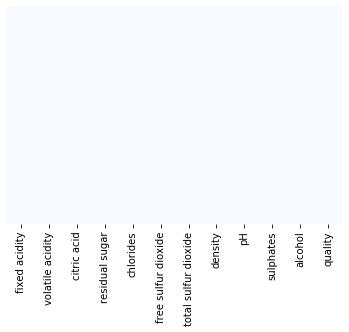

In [12]:
#checking for null values in the columns using a heatmap in red wine dataset
sns.heatmap(df_red.isnull(),cbar=False,yticklabels=False,cmap = 'Blues')

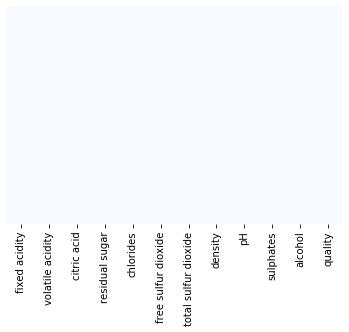

In [13]:
#checking for null values in the columns using a heatmap in white wine dataset
sns.heatmap(df_white.isnull(),cbar=False,yticklabels=False,cmap = 'Blues')

In the columns in any of the red wine or white wine datasets we do not have any null values. In case there was any null value there would be a different shade of blue for that perticular value.

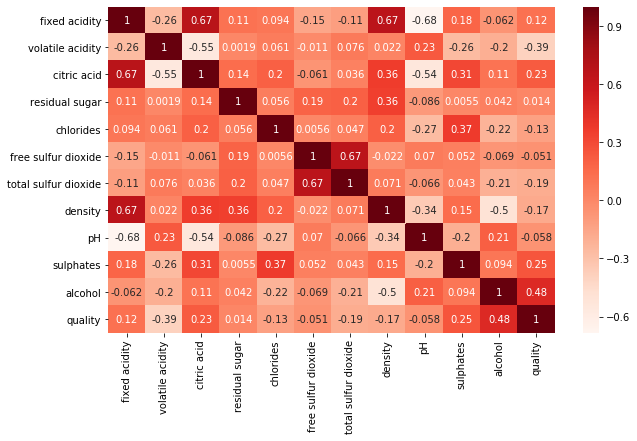

In [14]:
#Checking the correlation bertween the features in red wine dataset
plt.figure(figsize=(10,6))
sns.heatmap(df_red.corr(), annot=True, cmap='Reds')

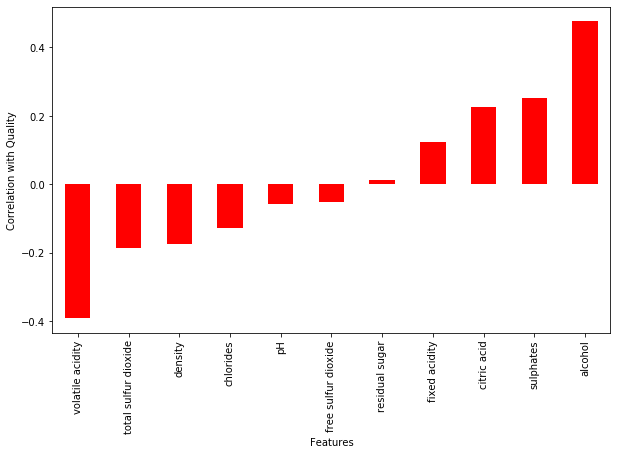

In [15]:
#Checking the correlation bertween the features in red wine dataset with regards to quality using a bar graph
plt.figure(figsize=(10,6))
plt.xlabel('Features')
plt.ylabel('Correlation with Quality')
df_red.corr()['quality'][:-1].sort_values().plot(kind='bar', color='r')

Among the features in the red wine dataset, citric acid and fixed acidity (0.67), density and fixed acidity (0.67) and total sulfure dioxide and free sulfure dioxide (0.67) have the highest positive correlations and citric acid and volatile acidity (-0.55), citric acid and pH (-0.54), alcohol and density (-0.5) and fixed acidity and pH (-0.68) have the highest negative correlations.

In red wine dataset, 'alcohol', 'sulphates' anf 'citric acid' have the highest positive correlations with the quality and 'volatile acidity', 'total sulfure dioxide' and 'density' have the highest negative correlation with the quality.

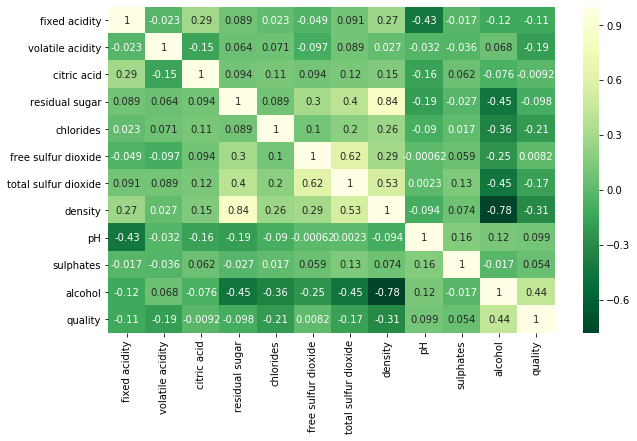

In [16]:
#Checking the correlation bertween the features in white wine dataset
plt.figure(figsize=(10,6))
sns.heatmap(df_white.corr(), annot=True, cmap='YlGn_r')

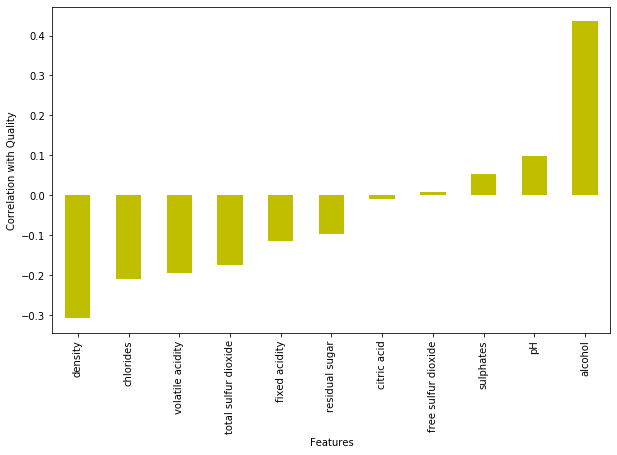

In [17]:
#Checking the correlation bertween the features in white wine dataset with regards to quality
plt.figure(figsize=(10,6))
plt.xlabel('Features')
plt.ylabel('Correlation with Quality')
df_white.corr()['quality'][:-1].sort_values().plot(kind='bar', color="y")

Among the features in the white wine dataset, density and residual sugars (0.84), density and total sulfure oxide (0.51) and total sulfure dioxide and free sulfure dioxide (0.62) have the highest positive correlations. On the other hand alcohol and density (-0.78) have the highest negative correlation.

In white wine dataset, 'alcohol', 'pH' anf 'sulphates' have the highest positive correlations with the quality and 'density', 'chlorides' and 'volatile acidity' have the highest negative correlation with the quality.

### Checking the distribution of the features in the dataset

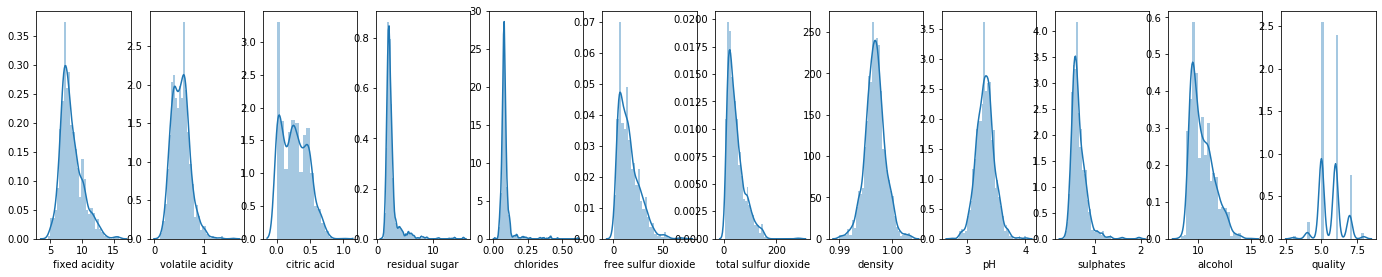

In [18]:
#Plotting out distributions for the variablesin red wine dataset
l = df_red.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_red[l[i]],kde=True)

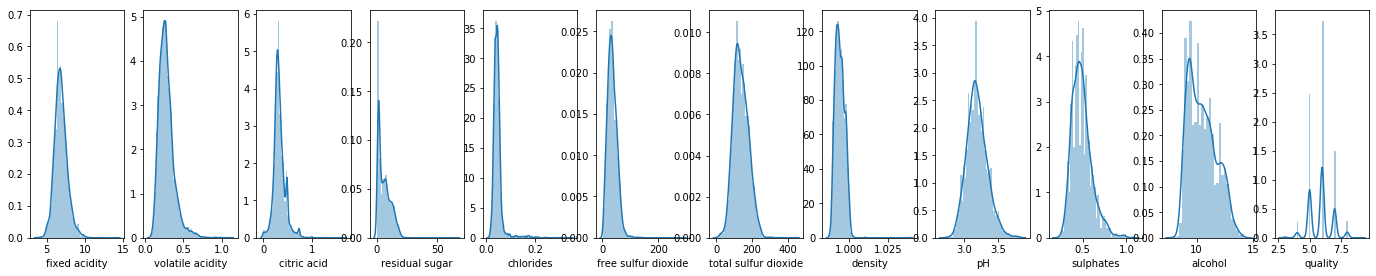

In [19]:
#Plotting out distributions for the variablesin white wine dataset

plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_white[l[i]],kde=True)

pH seems to be distributed normally. alcohol, sulphates, total slfur dioxide and fixed acidity are fairly normally distributed. All other features have a right skewness. 

### Checking the outliers in data

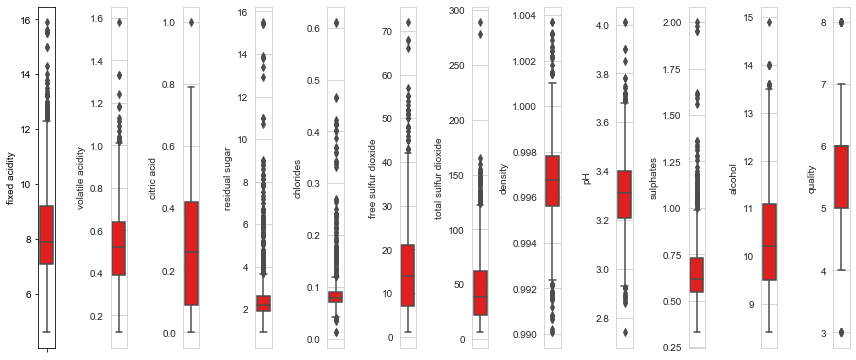

In [20]:
#making boxplots to visualize the outliers in the features in red wine dataset
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_red[l[i]],color='red',orient='v')
    plt.tight_layout()

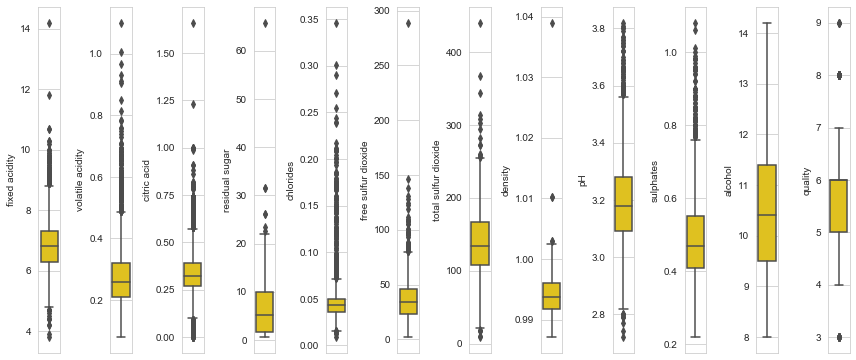

In [21]:
#making boxplots to visualize the outliers in the features in white wine dataset
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_white[l[i]],color='gold',orient='v')
    plt.tight_layout()

Except for the feature 'alcohol'  in white wine dataset, all other features in both datasets have outliers.

### Checking the correlations among the features

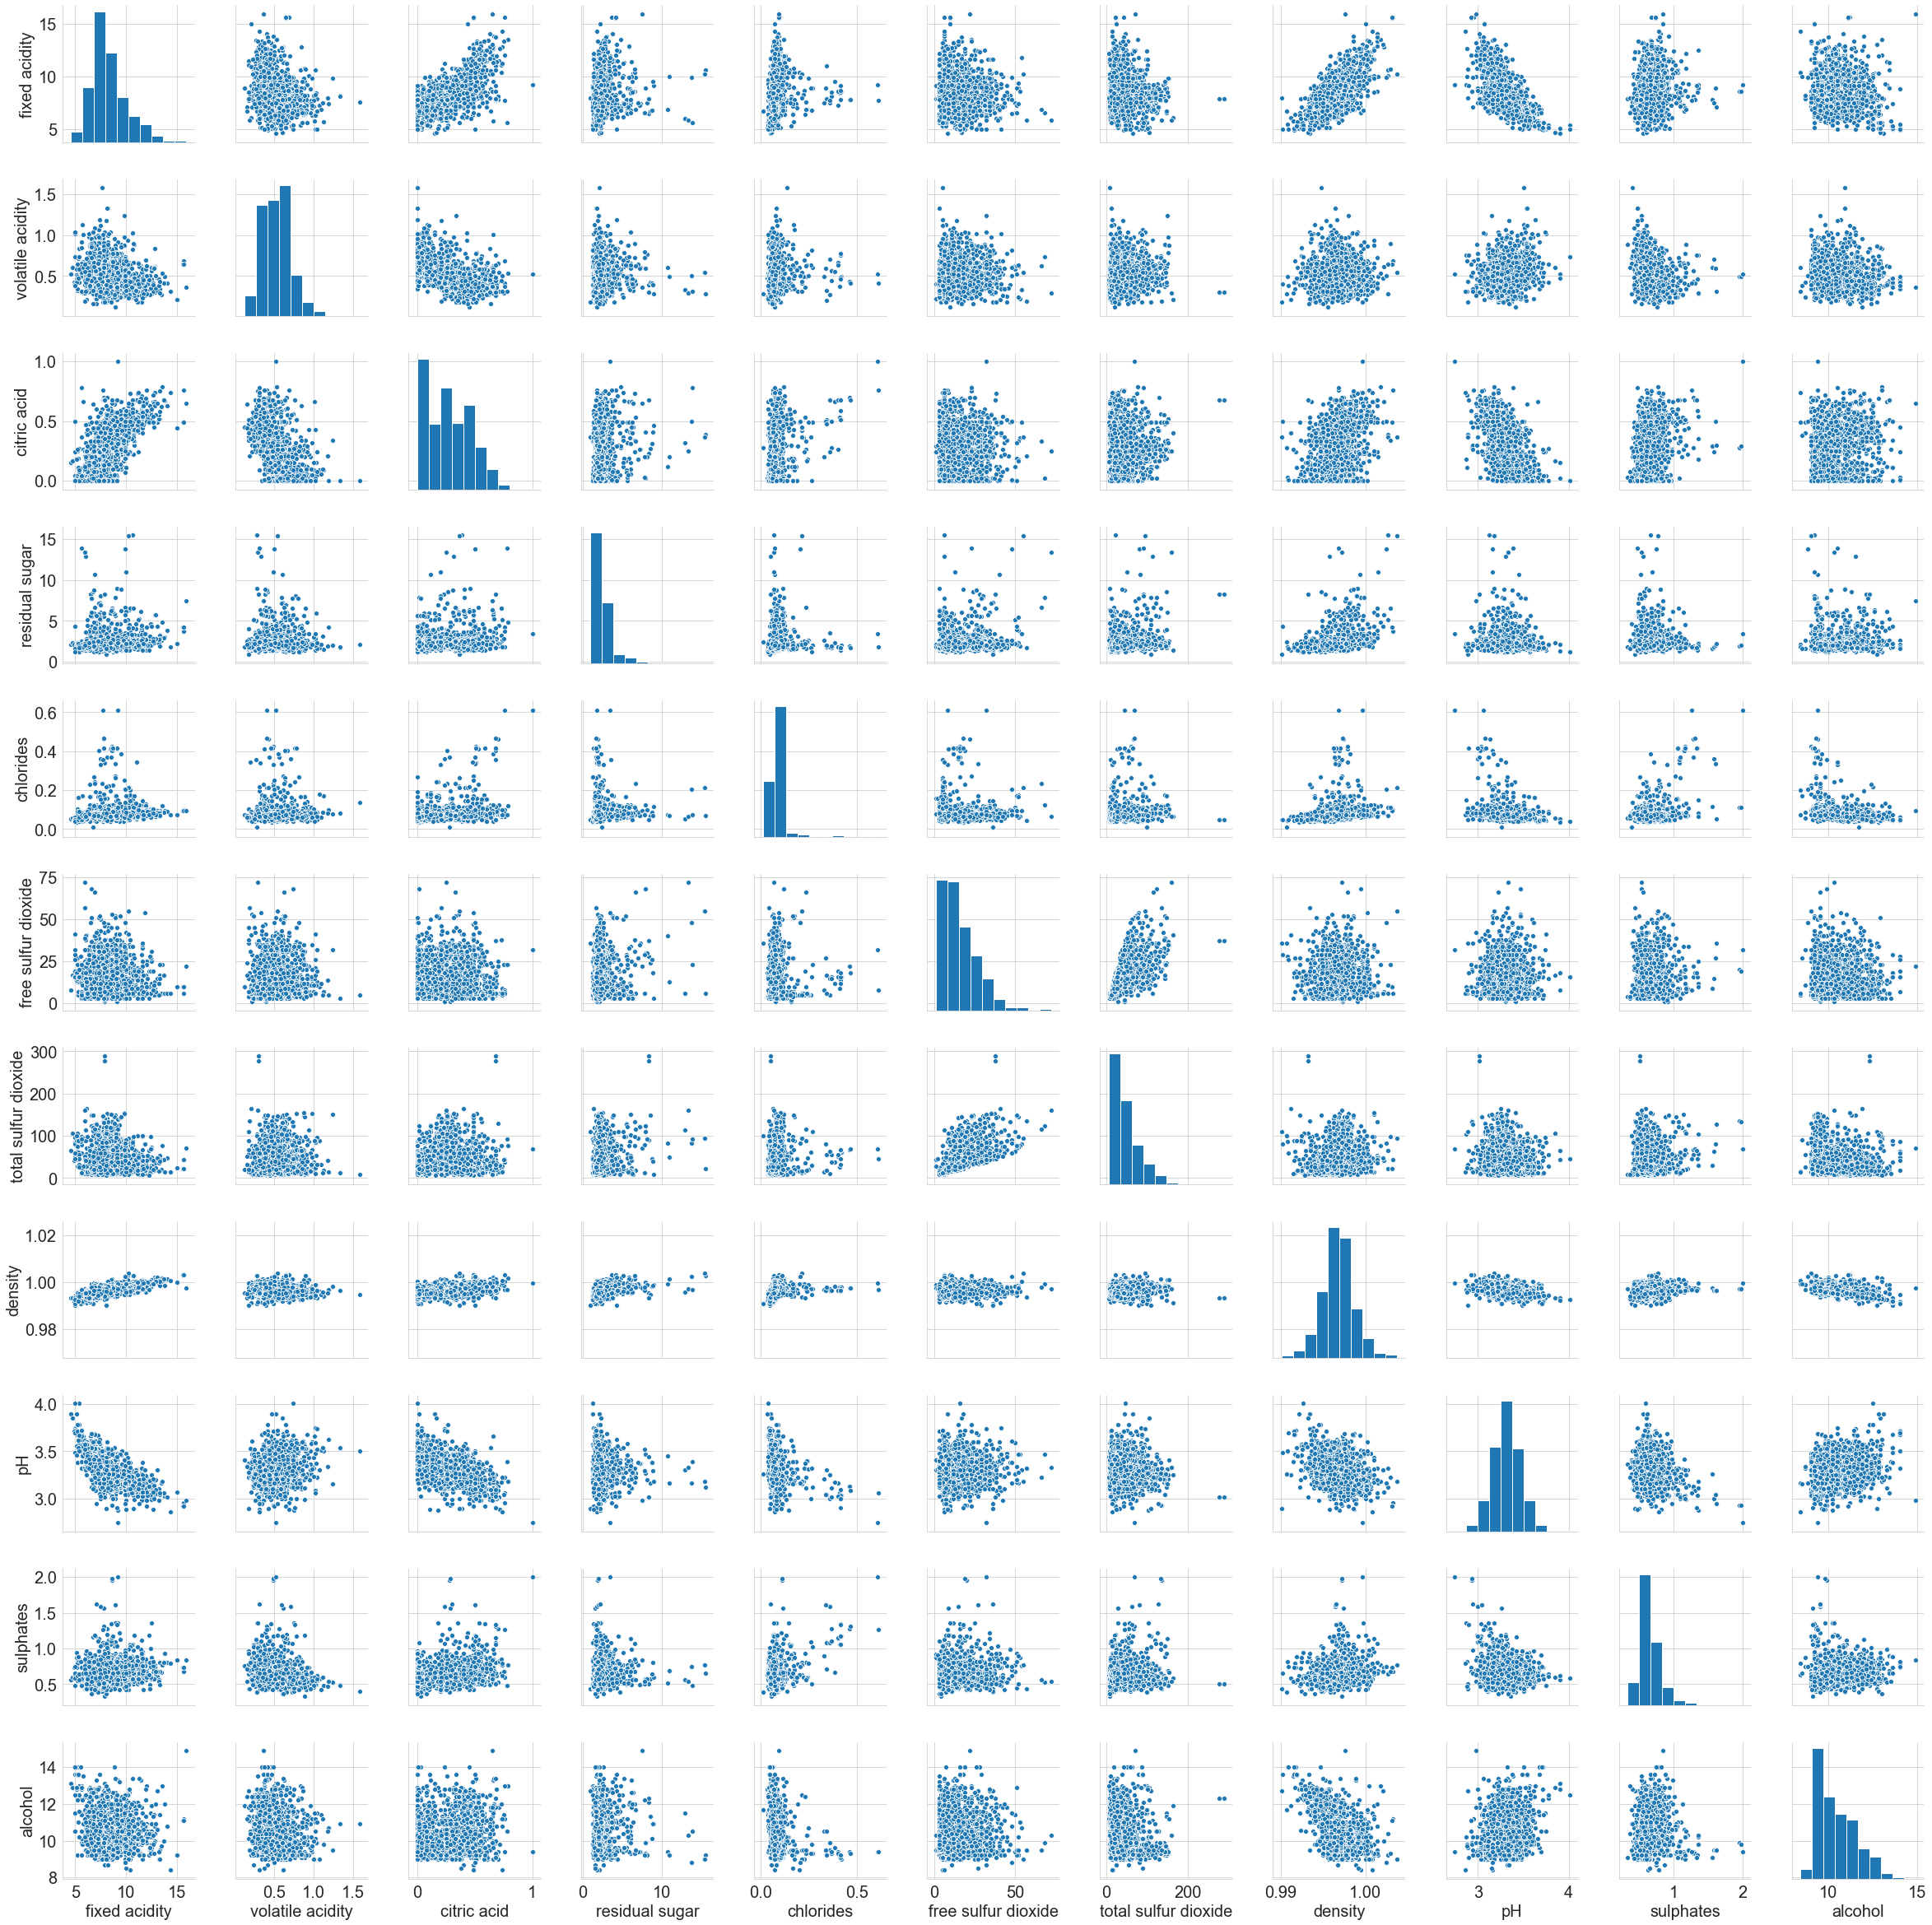

In [22]:
#creating pairplots to check the correlations in red wine dataset
plt.rcParams.update({'font.size': 20})
sns.pairplot(df_red.loc[:, df_red.columns != 'quality'], height=3)

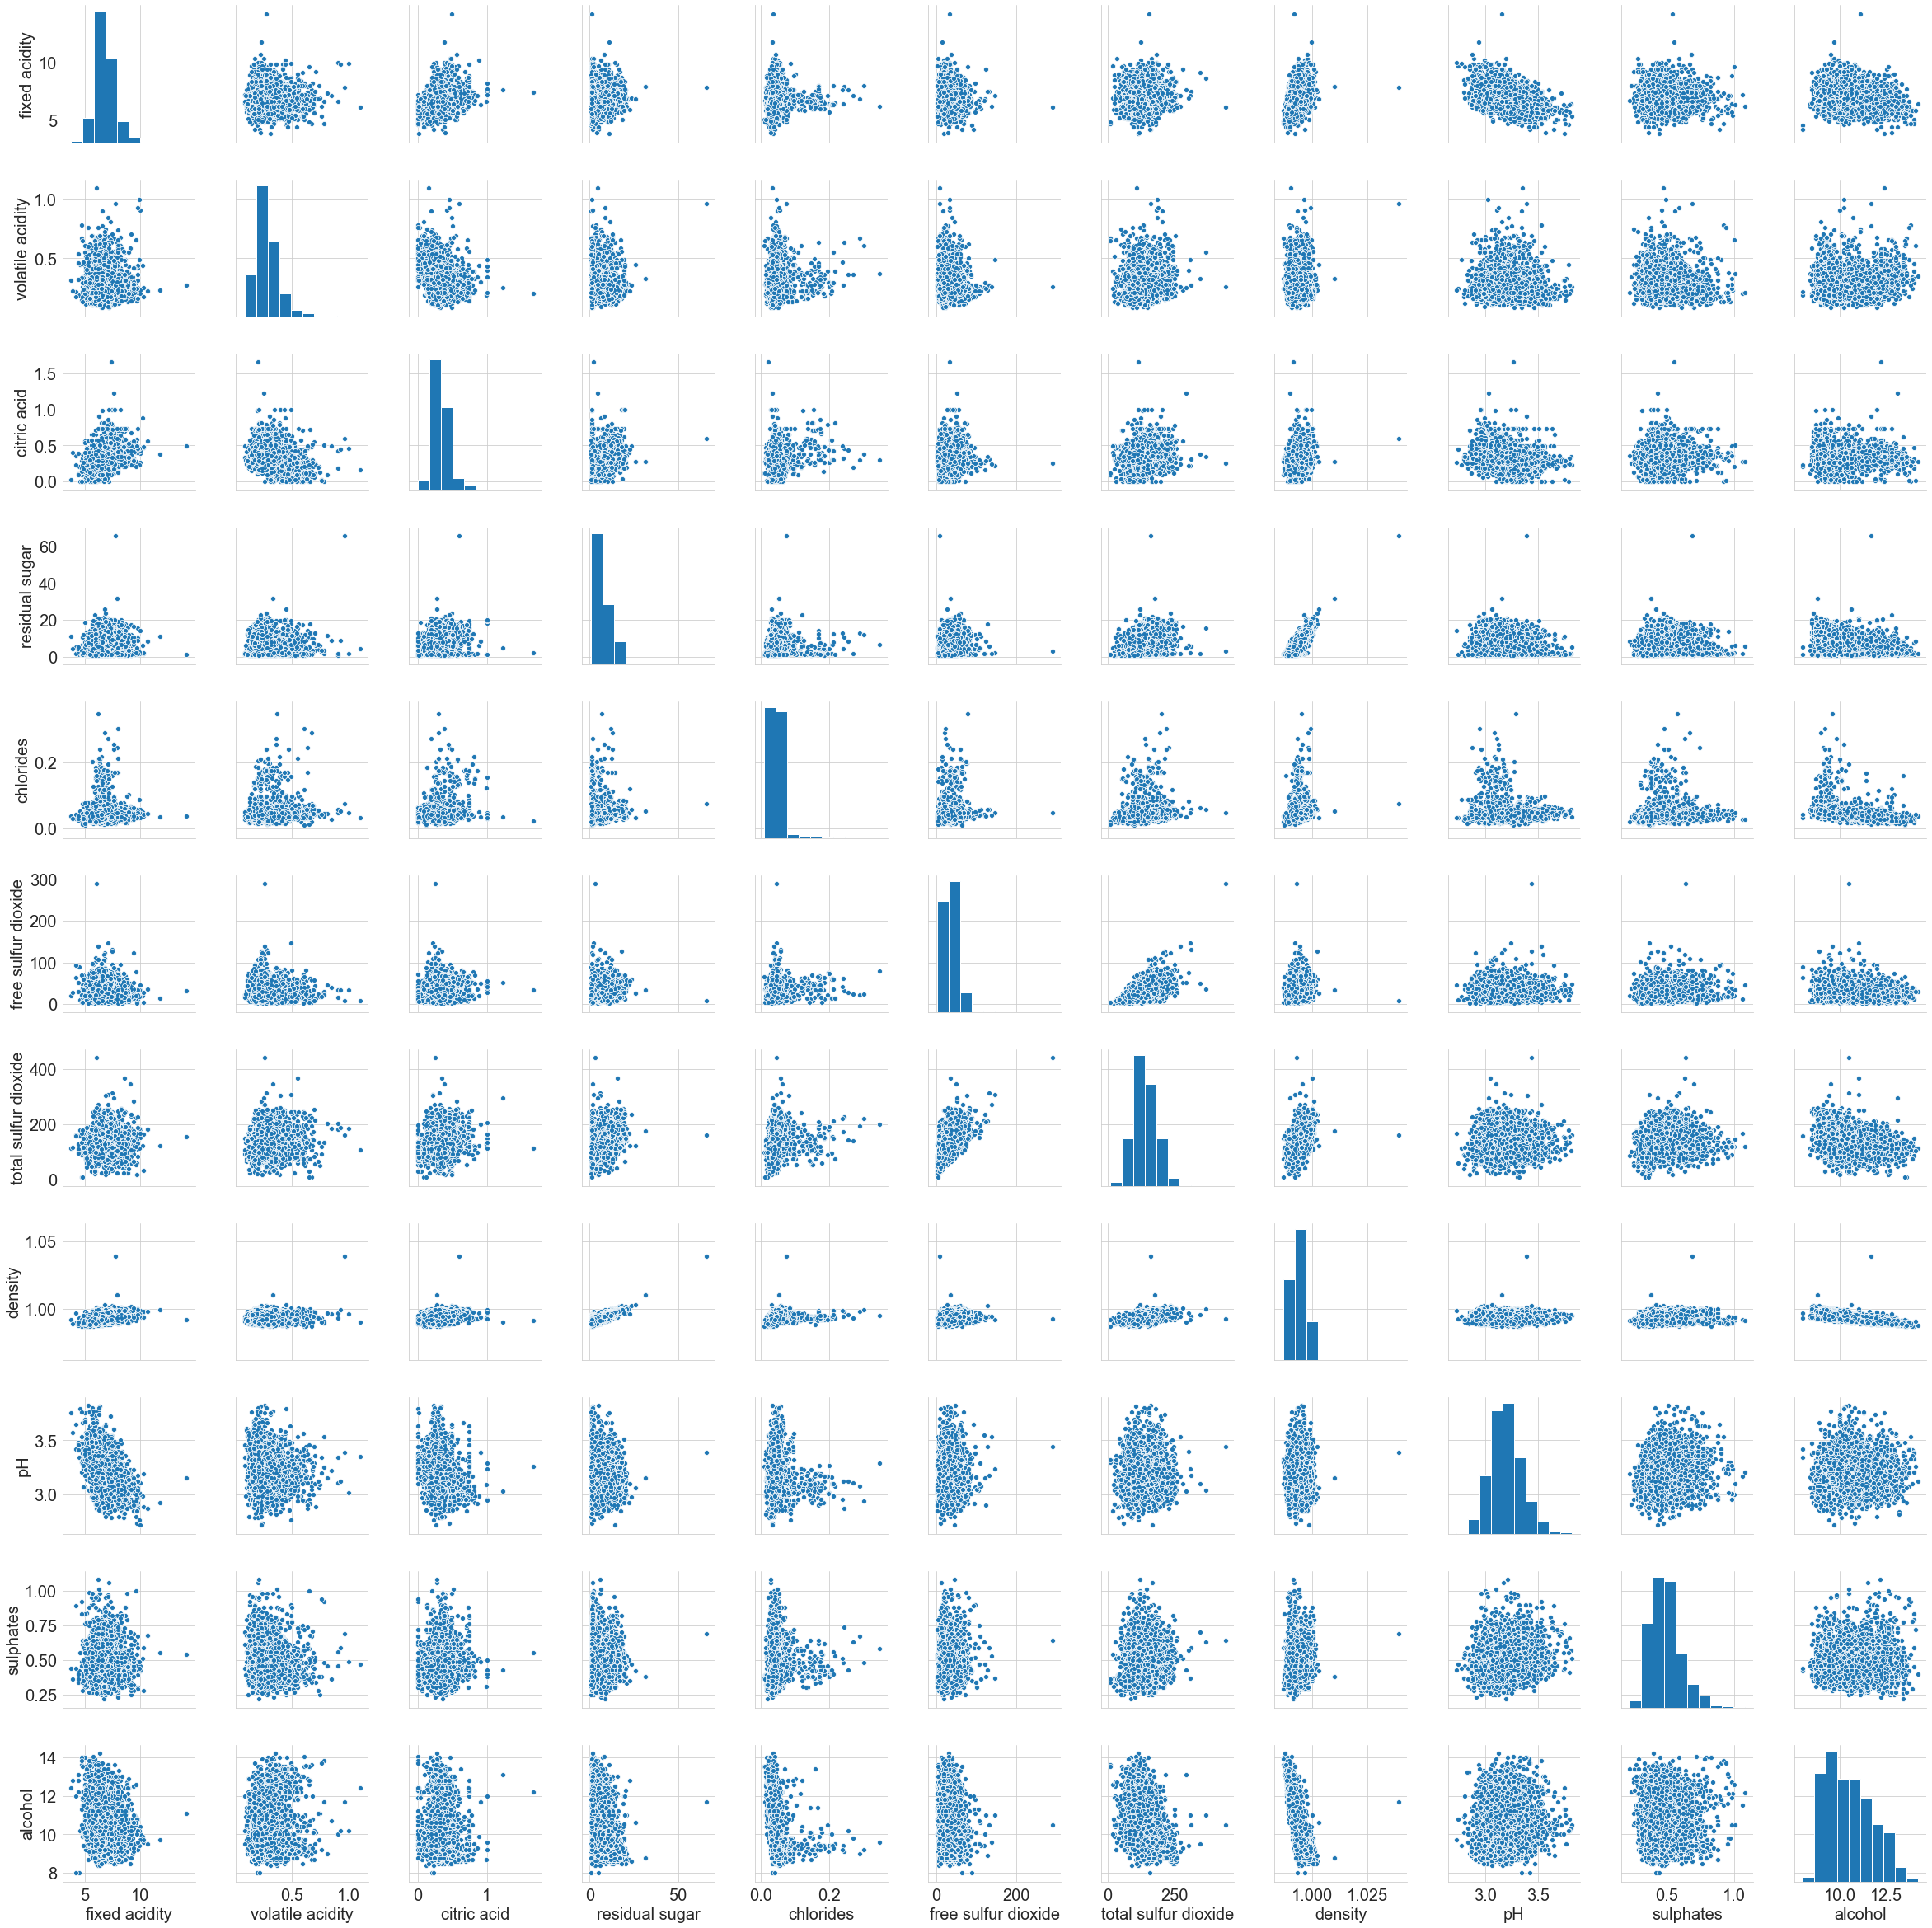

In [23]:
#creating pairplots to check the correlations in white wine dataset
plt.rcParams.update({'font.size': 20})
sns.pairplot(df_white.loc[:, df_white.columns != 'quality'], height=3)

The scatter plots in the pairplots above show the correlations and dependence of different features on each other.

### Appending the datasets

In [27]:
df_red['color']='red'
df_white['color']='white'
df = df_red.append(df_white)
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

### Visulization of features 

###### Number of wines in each quality

Text(0, 0.5, 'Number of Wines')

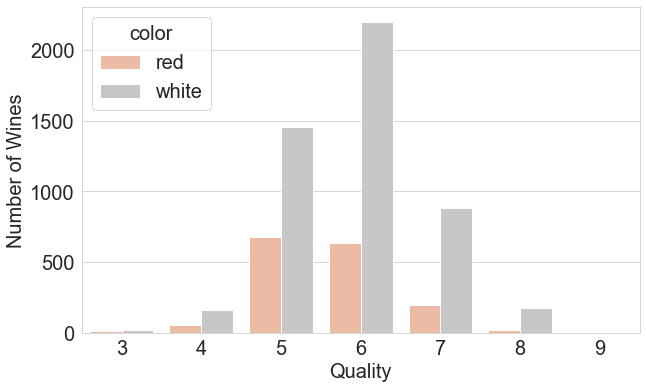

In [28]:
#Making a bar plot of the number of wines in eacg quality
plt.figure(figsize=(10,6))
sns.countplot(x='quality', hue='color', palette='RdGy', data=df)
plt.xlabel("Quality")
plt.ylabel("Number of Wines")

In the case of both datasets (red and white wines), we have the most number of wines with the qualities 5, 6 and 7.

Text(0, 0.5, 'Average Alcohol Contect')

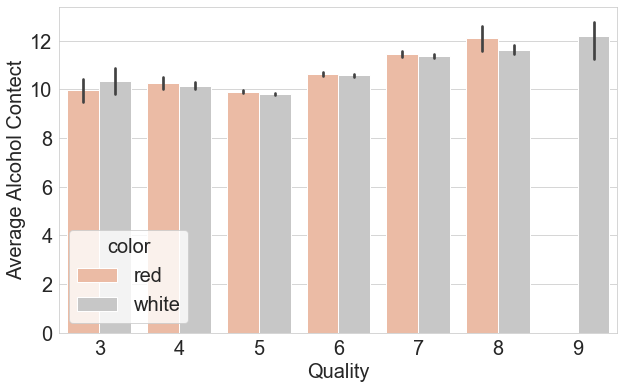

In [29]:
#Making a bar plot of the quality of the wines versus their average alcohol content
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='alcohol', hue='color', palette='RdGy',data=df)
plt.xlabel("Quality")
plt.ylabel("Average Alcohol Contect")

Text(0, 0.5, 'Average pH')

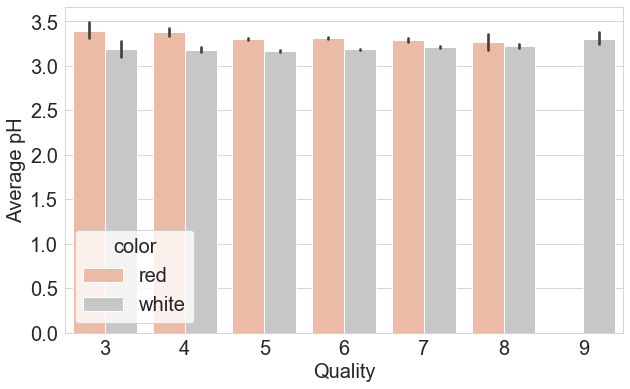

In [30]:
#Making a bar plot of the quality of the wines versus their average pH
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='pH', hue='color', palette='RdGy',data=df)
plt.xlabel("Quality")
plt.ylabel("Average pH")

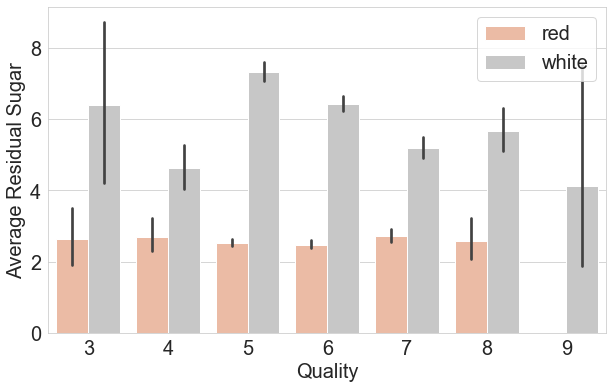

In [31]:
#Making a bar plot of the quality of the wines versus their average residual sugar
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='residual sugar', hue='color', palette='RdGy',data=df)
plt.xlabel("Quality")
plt.ylabel("Average Residual Sugar")
plt.legend(loc='upper right')

Text(0, 0.5, 'Average Citric Acid')

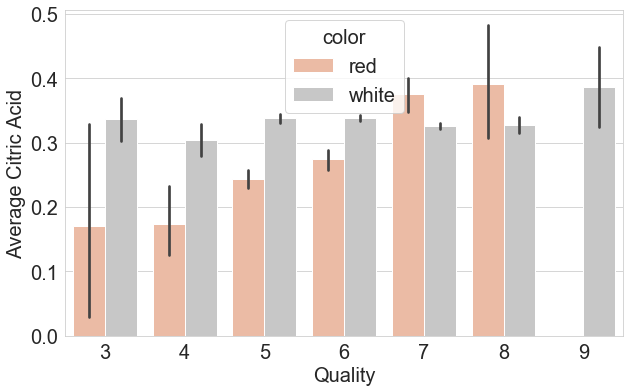

In [32]:
#Making a bar plot of the quality of the wines versus their average citric acid
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='citric acid', hue='color', palette='RdGy',data=df)
plt.xlabel("Quality")
plt.ylabel("Average Citric Acid")

Text(0, 0.5, 'Average Sulphates Content')

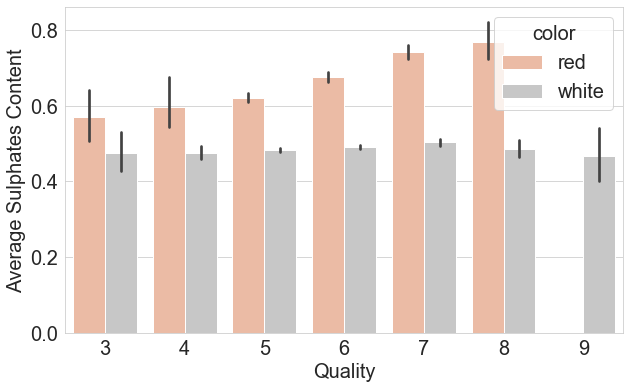

In [33]:
#Making a bar plot of the quality of the wines versus their average sulphates content
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='sulphates', hue='color', palette='RdGy',data=df)
plt.xlabel("Quality")
plt.ylabel("Average Sulphates Content")

Text(0, 0.5, 'Average Chlorides Content')

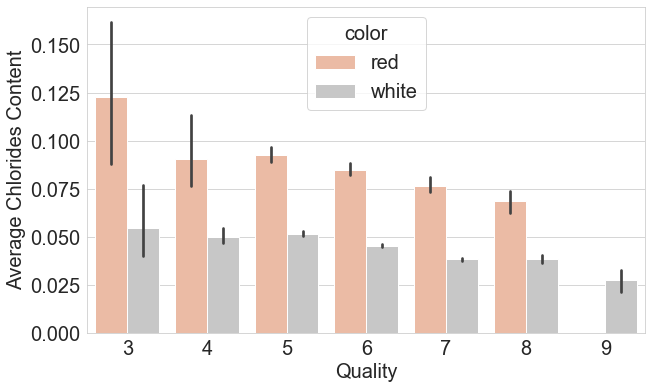

In [34]:
#Making a bar plot of the quality of the wines versus their average chloride content
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='chlorides', hue='color', palette='RdGy',data=df)
plt.xlabel("Quality")
plt.ylabel("Average Chlorides Content")

# Machine learning

Here we will predict the wine quality on a scale of 3 to 9 by modeling its features.

### Selecting the features with high correlation with the quality 

In [35]:
def red_features(threshold):
    corrs = df_red.corr()['quality'].drop('quality').abs()
    selected_corrs = corrs[corrs>threshold].index.values.tolist()
   

    return selected_corrs

In [36]:
features = red_features(0.1)
print(features)

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


### Spliting the dataset into train and test

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df_red[features]
y = df_red['quality']

In [39]:

X.head()

fixed acidity  volatile acidity  citric acid  chlorides  \
0            7.4              0.70         0.00      0.076   
1            7.8              0.88         0.00      0.098   
2            7.8              0.76         0.04      0.092   
3           11.2              0.28         0.56      0.075   
4            7.4              0.70         0.00      0.076   

   total sulfur dioxide  density  sulphates  alcohol  
0                  34.0   0.9978       0.56      9.4  
1                  67.0   0.9968       0.68      9.8  
2                  54.0   0.9970       0.65      9.8  
3                  60.0   0.9980       0.58      9.8  
4                  34.0   0.9978       0.56      9.4

In [40]:


y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

### Training a Linear Regression Model

In [52]:

 from sklearn.ensemble import RandomForestRegressor

In [43]:

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Evaluating the model

In [44]:
#importing the required moduled
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
#getting the errors for the testing dataset
pred = rf.predict(X_test)

print("MSE: %.2f"
      % mean_squared_error(y_test, pred))
print("MAE: %.2f"
      % mean_absolute_error(y_test, pred))
print("RMSE: %.2f"
      % mean_squared_error(y_test, pred)**0.5)

MSE: 0.49
MAE: 0.51
RMSE: 0.70


In [46]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:


pred = lr.predict(X_test)

print("MSE: %.2f"
      % mean_squared_error(y_test, pred))
print("MAE: %.2f"
      % mean_absolute_error(y_test, pred))
print("RMSE: %.2f"
      % mean_squared_error(y_test, pred)**0.5)

MSE: 0.49
MAE: 0.53
RMSE: 0.70


In [48]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
pred = rfc.predict(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,pred), confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         5
          4       0.17      0.05      0.08        19
          5       0.69      0.78      0.73       208
          6       0.62      0.63      0.62       180
          7       0.54      0.46      0.50        63
          8       0.50      0.20      0.29         5

avg / total       0.61      0.64      0.62       480
 [[  0   0   5   0   0   0]
 [  0   1  14   4   0   0]
 [  0   3 163  41   1   0]
 [  0   2  44 113  21   0]
 [  0   0  10  23  29   1]
 [  0   0   0   1   3   1]]


In [51]:

y_compare = np.vstack((y_test,pred)).T
y_compare[:12,:]

array([[5, 5],
       [5, 5],
       [5, 5],
       [7, 7],
       [6, 7],
       [6, 6],
       [5, 6],
       [7, 6],
       [6, 6],
       [5, 6],
       [7, 6],
       [5, 6]], dtype=int64)